In [2]:
%matplotlib inline
from numpy import heaviside, sign, hstack, absolute, all, dot, array, random
from scipy.integrate import solve_ivp
from pylab import subplot, plot, yscale, ylabel
import numpy as np

/Users/shubhamgajrani/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## 8 species

In [3]:
%matplotlib inline
from numpy import heaviside, sign, hstack, absolute, all, dot, random
from scipy.integrate import solve_ivp
#from scipy import random
from pylab import subplot, plot, yscale, imshow, colorbar
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (12,10)

In [4]:
def fm(t, y, po, k, sn):
    N = y[:sn]
    p = y[sn:]
    r = all(np.exp(-((np.abs(p - po)) ** 2)), axis = 1)
    dN_dt = (r-d)*N
    dp_dt = np.dot(k,N)-d*p  # Assuming p in the inflowing media is 0
    return np.hstack([dN_dt, dp_dt])

In [5]:
#number of species
sn=8

#number of toxins
pn=3

#random parameters

#optimal p values for species
#po=(random.rand(sn,pn)-0.5)*3  # dimension has to be sn*pn

#change of p by species
#k=10e-3*(random.rand(pn,sn))*sign(po).T  # microbes change toxin concentration in the direction they prefer (without that many communities are not multistable (? not rigorously tested))

p_ini=[0,0,0] #initial p values

d=0.1 #dilution rate

In [7]:
from Parameter_values_CM_Simulations_Gaussian_function import po, k, N_ini_1, N_ini_2, N_ini_3, N_ini_4, N_ini_5, N_ini_6, g_p_stat

In [8]:
import pandas as pd
import statistics as stats
columns = ['Species','No Sup', 'Sup1', 'Sup2', 'Sup3', 'Sup4', 'Sup5', 'Sup6', 'Sup7', 'Sup8']
df1_1 = pd.DataFrame(columns = columns)
df1_2 = pd.DataFrame(columns = columns)
df1_3 = pd.DataFrame(columns = columns)
df1_4 = pd.DataFrame(columns = columns)
df1_5 = pd.DataFrame(columns = columns)
df1_6 = pd.DataFrame(columns = columns)

Species = ['Species 1', 'Species 2', 'Species 3', 'Species 4', 'Species 5', 'Species 6', 'Species 7', 'Species 8']
df1_1['Species'] = Species
df1_2['Species'] = Species
df1_3['Species'] = Species
df1_4['Species'] = Species
df1_5['Species'] = Species
df1_6['Species'] = Species

dfs = [df1_1, df1_2, df1_3, df1_4, df1_5, df1_6]
N_inis = [N_ini_1, N_ini_2, N_ini_3, N_ini_4, N_ini_5, N_ini_6]

/Users/shubhamgajrani/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/shubhamgajrani/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [9]:
for i, (dfx, N_ini) in enumerate(zip(dfs, N_inis), start=1):
    for x,y in zip(g_p_stat, np.arange(1,9)):
        p_ini = x
        print(p_ini)
        y0=hstack([N_ini,p_ini])
        res=solve_ivp(fm,[0,300],y0,max_step=1, args=(po,k,sn))
        listx = (res.y[:sn])
        final = [len(sublist) for sublist in listx]
        print(final)
        final_comp = [stats.mean(sublist[-20:]) for sublist in listx]
        final_comp
        dfx.loc[:, 'Sup'+str(y)] = final_comp
        print(dfx)
        #df['Sup'+str(y)] = final_comp

    p_ini = [0,0,0]
    y0=hstack([N_ini,p_ini])
    res=solve_ivp(fm,[0,300],y0,max_step=1, args=(po,k,sn))
    listx = (res.y[:sn])
    final = [len(sublist) for sublist in listx]
    print(final)
    final_comp = [stats.mean(sublist[-20:]) for sublist in listx]
    final_comp
    dfx.loc[:, 'No Sup'] = final_comp
    print(dfx)

[28.781881905821585, -15.65584038451249, 11.14534095910436]
[374, 374, 374, 374, 374, 374, 374, 374]
     Species No Sup               Sup1 Sup2 Sup3 Sup4 Sup5 Sup6 Sup7 Sup8
0  Species 1    NaN           0.001624  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1  Species 2    NaN            0.00017  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2  Species 3    NaN  6524044417.998066  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3  Species 4    NaN           0.403784  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4  Species 5    NaN           0.012537  NaN  NaN  NaN  NaN  NaN  NaN  NaN
5  Species 6    NaN           4.391717  NaN  NaN  NaN  NaN  NaN  NaN  NaN
6  Species 7    NaN           0.005899  NaN  NaN  NaN  NaN  NaN  NaN  NaN
7  Species 8    NaN           0.006433  NaN  NaN  NaN  NaN  NaN  NaN  NaN
[-30.244476607340474, -23.42707672993048, 17.488240728444822]
[361, 361, 361, 361, 361, 361, 361, 361]
     Species No Sup               Sup1               Sup2 Sup3 Sup4 Sup5 Sup6  \
0  Species 1    NaN           0.001624           

[374, 374, 374, 374, 374, 374, 374, 374]
     Species No Sup               Sup1               Sup2               Sup3  \
0  Species 1    NaN           0.001624           0.001195           0.004936   
1  Species 2    NaN            0.00017           0.002316           0.000155   
2  Species 3    NaN  6524044417.998066  6659286828.559961  6605067999.935673   
3  Species 4    NaN           0.403784           0.740465           0.235225   
4  Species 5    NaN           0.012537           0.006459           0.014958   
5  Species 6    NaN           4.391717           9.822711            9.34867   
6  Species 7    NaN           0.005899           0.047456            0.00311   
7  Species 8    NaN           0.006433           0.027552           0.005524   

               Sup4               Sup5               Sup6               Sup7  \
0          0.001105           0.000624           0.001961           0.000955   
1          0.000786           0.000164           0.000157            0.00156  

[381, 381, 381, 381, 381, 381, 381, 381]
     Species No Sup               Sup1               Sup2              Sup3  \
0  Species 1    NaN           1.148303           4.995755          1.125481   
1  Species 2    NaN           0.001971  3324255823.131107           0.00204   
2  Species 3    NaN  6524434947.071301           0.005732  6850788781.10338   
3  Species 4    NaN           0.000317           0.024994          0.000502   
4  Species 5    NaN           0.064682           0.019251          0.076025   
5  Species 6    NaN           0.180354           0.018775           0.19973   
6  Species 7    NaN           0.001509           0.148858          0.001324   
7  Species 8    NaN           0.000225           0.023411          0.000195   

                Sup4               Sup5               Sup6               Sup7  \
0           6.521779           1.898301           1.262775           6.131193   
1           0.037206           0.002374           0.001648  3310083621.448908   
2  6

[366, 366, 366, 366, 366, 366, 366, 366]
     Species No Sup               Sup1              Sup2               Sup3  \
0  Species 1    NaN           6.421951           2.03631           3.385418   
1  Species 2    NaN           0.007611  3376832396.45267           0.009487   
2  Species 3    NaN  6537956240.458943          0.000177  6640058364.644879   
3  Species 4    NaN           0.003557          0.004323           0.004261   
4  Species 5    NaN           0.540412          0.031015           0.567077   
5  Species 6    NaN           0.444049          0.005439           0.542138   
6  Species 7    NaN           0.000097          0.000954           0.000115   
7  Species 8    NaN           0.003048           0.14793           0.003377   

                Sup4               Sup5               Sup6 Sup7 Sup8  
0           0.218792           3.764452           13.58825  NaN  NaN  
1  3416287335.110431           0.008164             0.0085  NaN  NaN  
2           0.000323  6445861242.5

[366, 366, 366, 366, 366, 366, 366, 366]
     Species No Sup               Sup1               Sup2              Sup3  \
0  Species 1    NaN           0.000707           0.000092          0.000509   
1  Species 2    NaN           0.015593  3315922386.637047          0.012234   
2  Species 3    NaN  6543755729.389019           0.006011  6647374722.22506   
3  Species 4    NaN           0.090471           0.003519          0.078708   
4  Species 5    NaN           0.152299           0.011433          0.112938   
5  Species 6    NaN           0.020845           0.000099          0.015073   
6  Species 7    NaN           0.101582            0.41533          0.066835   
7  Species 8    NaN           0.002959           0.007388          0.002177   

  Sup4 Sup5 Sup6 Sup7 Sup8  
0  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  
5  NaN  NaN  NaN  NaN  NaN  
6  NaN  NaN  NaN  NaN  NaN  
7  NaN  NaN  Na

[359, 359, 359, 359, 359, 359, 359, 359]
     Species             No Sup               Sup1               Sup2  \
0  Species 1           0.000979           0.000707           0.000092   
1  Species 2           0.097853           0.015593  3315922386.637047   
2  Species 3  6539556294.069733  6543755729.389019           0.006011   
3  Species 4           0.196312           0.090471           0.003519   
4  Species 5           0.142739           0.152299           0.011433   
5  Species 6           0.111849           0.020845           0.000099   
6  Species 7           0.352599           0.101582            0.41533   
7  Species 8           0.009785           0.002959           0.007388   

               Sup3               Sup4               Sup5               Sup6  \
0          0.000509           0.000264           0.000672           0.000637   
1          0.012234  3357043540.074019           0.017671           0.014054   
2  6647374722.22506           0.016098  6598624658.148782  67

[362, 362, 362, 362, 362, 362, 362, 362]
     Species No Sup               Sup1               Sup2               Sup3  \
0  Species 1    NaN           2.284879           0.071301           3.835087   
1  Species 2    NaN  3364999928.484581  3209898171.669966  3316685900.997792   
2  Species 3    NaN           0.000056           0.000006            0.00009   
3  Species 4    NaN           0.019257           0.005917           0.020284   
4  Species 5    NaN           0.004699           0.000934            0.00637   
5  Species 6    NaN           0.001255           0.000172           0.001336   
6  Species 7    NaN            0.00017           0.000553           0.000161   
7  Species 8    NaN           0.622312           0.141754           0.415355   

               Sup4               Sup5              Sup6               Sup7  \
0          0.093097           3.354242          4.166301           0.059604   
1  3402534525.23019  3186866452.529122  3356030569.84932  3418755453.127684   
2

[370, 370, 370, 370, 370, 370, 370, 370]
     Species No Sup               Sup1               Sup2               Sup3  \
0  Species 1    NaN           0.001264           0.000001           0.000905   
1  Species 2    NaN             0.0131  3421510880.777445           0.014241   
2  Species 3    NaN  6529672382.201317           0.000011  6565894655.092536   
3  Species 4    NaN           0.000387           0.000275           0.000611   
4  Species 5    NaN           0.047784           0.001878           0.113302   
5  Species 6    NaN           7.326704           0.017079           3.532236   
6  Species 7    NaN           0.001704           0.052694           0.001821   
7  Species 8    NaN           0.000221           0.000434            0.00025   

                Sup4               Sup5               Sup6               Sup7  \
0           0.000006           0.001641           0.002833           0.000002   
1  3292562118.854307           0.014192           0.014779  3336840918.33904

In [10]:
df1_4

,Species,No Sup,Sup1,Sup2,Sup3,Sup4,Sup5,Sup6,Sup7,Sup8
0,Species 1,0.000979,0.000707,0.000092,0.000509,0.000264,0.000672,0.000637,0.000108,0.000359
1,Species 2,0.097853,0.015593,3315922386.637047,0.012234,3357043540.074019,0.017671,0.014054,3387556130.669997,3261497925.938028
2,Species 3,6539556294.069733,6543755729.389019,0.006011,6647374722.22506,0.016098,6598624658.148782,6721820393.892399,0.007434,0.013114
3,Species 4,0.196312,0.090471,0.003519,0.078708,0.009656,0.104335,0.099382,0.004281,0.007852
4,Species 5,0.142739,0.152299,0.011433,0.112938,0.033151,0.207667,0.163929,0.012748,0.014082
5,Species 6,0.111849,0.020845,0.000099,0.015073,0.000264,0.024107,0.02045,0.000108,0.000196
6,Species 7,0.352599,0.101582,0.41533,0.066835,0.492285,0.122599,0.08292,0.292405,0.584877
7,Species 8,0.009785,0.002959,0.007388,0.002177,0.009309,0.003282,0.002667,0.009018,0.010804


In [11]:
p_ini = g_p_stat[1]
#solve equations
y0=hstack([N_ini_2,p_ini])
res=solve_ivp(fm,[0,300],y0,max_step=1, args=(po,k,sn))
listx = (res.y[:sn])

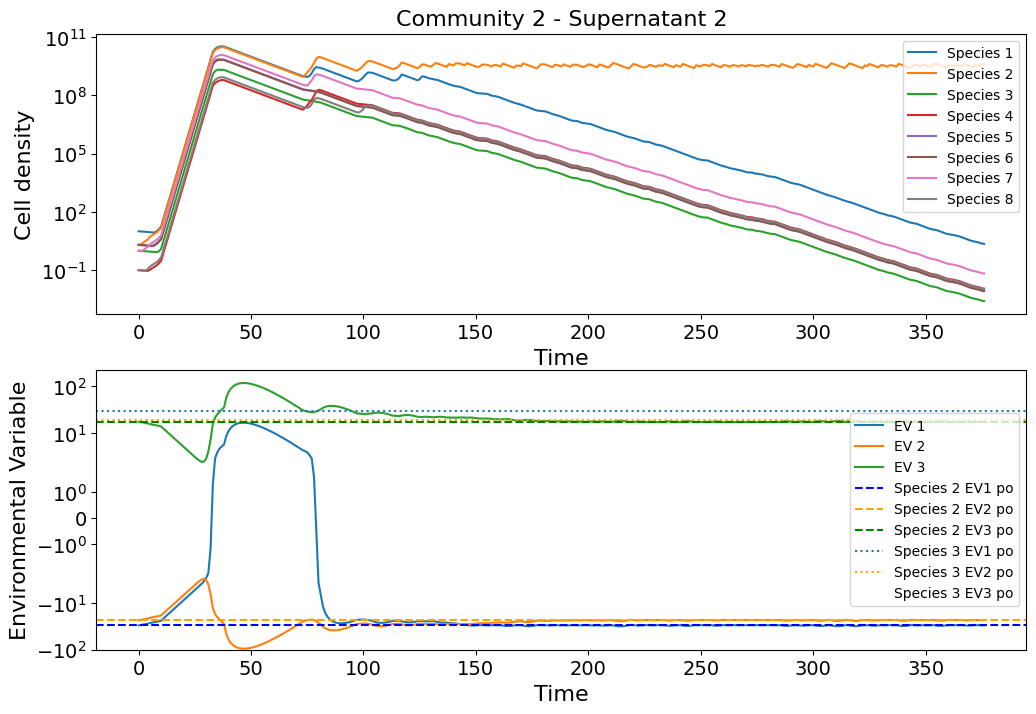

In [12]:
import matplotlib.style
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
mpl.style.use('default')
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 14})


fig = plt.figure()
y1 = fig.add_subplot(211)
y1.plot(res.y[:sn].T, label = Species)
y1.set_yscale('log')
y1.set_ylabel('Cell density', fontsize = 16)
y1.set_xlabel('Time', fontsize = 16)
y1.set_title('Community 2 - Supernatant 2', fontsize = 16)
plt.legend(fontsize = 10)

y2 = fig.add_subplot(212)
plot(res.y[sn:].T, label = ['EV 1', 'EV 2', 'EV 3'])
y2.set_yscale('symlog')
y2.set_ylabel('Environmental Variable', fontsize = 16)
y2.set_xlabel('Time', fontsize = 16)
y2.axhline(y = -30.24, xmin = 0, xmax = 400, label = 'Species 2 EV1 po', c = 'Blue', linestyle = '--')
y2.axhline(y = -23.42, xmin = 0, xmax = 400, label = 'Species 2 EV2 po', c = 'Orange', linestyle = '--')
y2.axhline(y = 17.48, xmin = 0, xmax = 400, label = 'Species 2 EV3 po', c = 'Green', linestyle = '--')

y2.axhline(y = 29.78, xmin = 0, xmax = 400, label = 'Species 3 EV1 po', c = 'C0', linestyle = ':')
y2.axhline(y = 19.36, xmin = 0, xmax = 400, label = 'Species 3 EV2 po', c = 'Orange', linestyle = ':')
y2.axhline(y = -6.21, xmin = 0, xmax = 400, label = 'Species 3 EV3 po', c = 'Green', linestyle = '')

y2.set_ylim(bottom = -100)
plt.legend(loc = 'center right', fontsize = 10)

#species 2 g_p_stat = [-30.244476607340474, -23.42707672993048, 17.488240728444822]
#species 3 g_p_stat = [29.779743482951254, 19.368062553555024, -6.213605932947415]
matplotlib.rcParams['svg.fonttype'] = 'none'
#plt.savefig('Rev_Supp_Fig_C.svg', bbox_inches = 'tight', format = 'svg')

In [13]:
p_ini = g_p_stat[0]
#solve equations
y0=hstack([N_ini_2,p_ini])
res=solve_ivp(fm,[0,300],y0,max_step=1, args=(po,k,sn))
listx = (res.y[:sn])

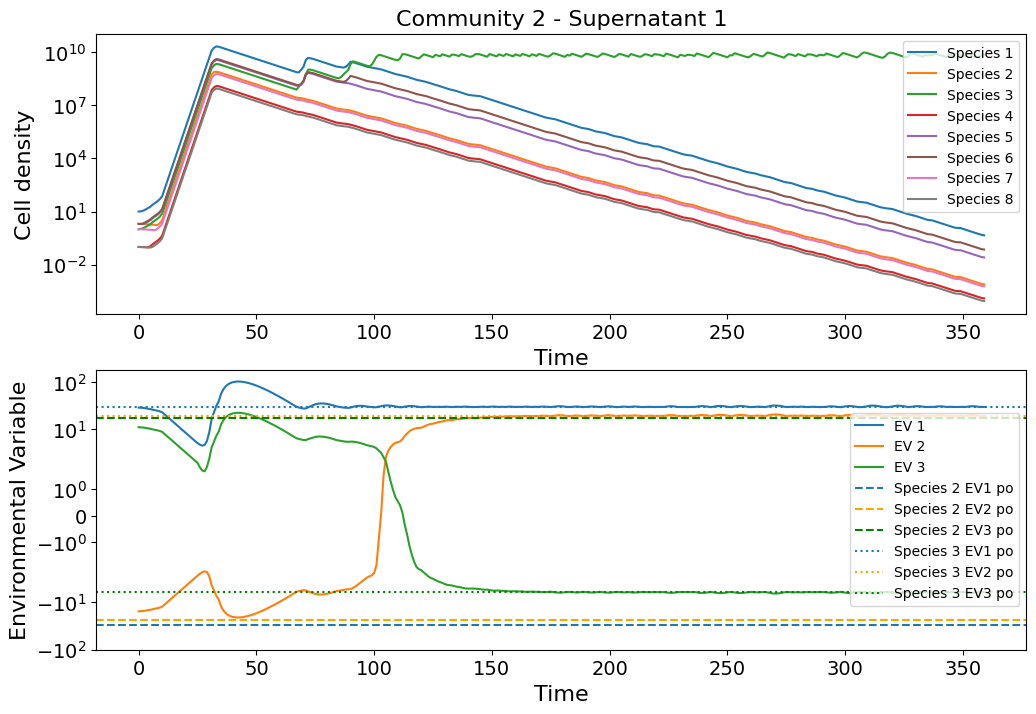

In [14]:
import matplotlib.style
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
mpl.style.use('default')
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 14})


fig = plt.figure()
y1 = fig.add_subplot(211)
y1.plot(res.y[:sn].T, label = Species)
y1.set_yscale('log')
y1.set_ylabel('Cell density', fontsize = 16)
y1.set_xlabel('Time', fontsize = 16)
y1.set_title('Community 2 - Supernatant 1', fontsize = 16)
plt.legend(fontsize = 10)

y2 = fig.add_subplot(212)
plot(res.y[sn:].T, label = ['EV 1', 'EV 2', 'EV 3'])
y2.set_yscale('symlog')
y2.set_ylabel('Environmental Variable', fontsize = 16)
y2.set_xlabel('Time', fontsize = 16)
y2.axhline(y = -30.24, xmin = 0, xmax = 400, label = 'Species 2 EV1 po', c = 'C0', linestyle = '--')
y2.axhline(y = -23.42, xmin = 0, xmax = 400, label = 'Species 2 EV2 po', c = 'Orange', linestyle = '--')
y2.axhline(y = 17.48, xmin = 0, xmax = 400, label = 'Species 2 EV3 po', c = 'Green', linestyle = '--')

y2.axhline(y = 29.78, xmin = 0, xmax = 400, label = 'Species 3 EV1 po', c = 'C0', linestyle = ':')
y2.axhline(y = 19.36, xmin = 0, xmax = 400, label = 'Species 3 EV2 po', c = 'Orange', linestyle = ':')
y2.axhline(y = -6.21, xmin = 0, xmax = 400, label = 'Species 3 EV3 po', c = 'Green', linestyle = ':')

y2.set_ylim(bottom = -100)
plt.legend(loc = 'center right', fontsize = 10)

#species 2 g_p_stat = [-30.244476607340474, -23.42707672993048, 17.488240728444822]
#species 3 g_p_stat = [29.779743482951254, 19.368062553555024, -6.213605932947415]
matplotlib.rcParams['svg.fonttype'] = 'none'
#plt.savefig('Rev_Supp_Fig_D.svg', bbox_inches = 'tight')

### Growth of single species: Finding pstst using randomly generated values of po and k

In [169]:
def fm(t, y, po, k, sn):
    N = y[:sn]
    p = y[sn:]
    r = all(np.exp(-((np.abs(p - po)) ** 2)), axis = 1)
    dN_dt = (r-d)*N
    dp_dt = np.dot(k,N)-d*p
    return np.hstack([dN_dt, dp_dt])

In [171]:
#number of species
sn=1

#number of toxins
pn=3

#random parameters

#optimal p values for species
# po=(random.rand(sn,pn)-0.4)*5 # dimension has to be sn*pn
# pox = [set1_po[1]]

#change of p by species
# k=10e-3*(random.rand(pn,sn))*sign(po).T # microbes change toxin concentration in the direction they prefer (without that many communities are not multistable (? not rigorously tested))
# kx = [[set1_k[0][1]], 
#     [set1_k[1][1]], 
#     [set1_k[2][1]]]
# kx = np.asarray(kx, dtype=np.float32)

# print(kx)
# print(pox)

[[-9.2385843e-10]
 [-7.1561174e-10]
 [ 5.3420196e-10]]
[[-2.61812832, -0.84983016, 2.69058358]]


In [172]:
# #intial values 
# N_ini=[10] #initial population densities

# p_ini= [0,0,0] #initial p values

# y0=hstack([N_ini,p_ini])
# #print(y0)

# d=0.1 #dilution rate

# res=solve_ivp(fm,[0,500],y0,max_step=1, args=(pox,kx,sn)) #solve equations

In [14]:
# import statistics
# mpl.style.use('default')
# plt.rcParams["figure.figsize"] = (12,8)
# plt.rcParams.update({'font.size': 14})

# subplot(211)
# plot(res.y[:sn].T)
# yscale('log')
# plt.xlabel('Time', fontsize = 16)
# plt.ylabel('Cell density', fontsize = 16)
# plt.title('Species 2')

# subplot(212)
# plot(res.y[sn:].T, label = ['EV 1', 'EV 2', 'EV 3'])
# x1 = [statistics.mean((res.y[sn:sn+1, -25:]).flatten()), statistics.mean((res.y[sn+1:sn+2, -25:]).flatten()), statistics.mean((res.y[sn+2:sn+3, -25:]).flatten())]
# #g_p_stat.append(x1)
# #print(x1)
# plt.xlabel('Time', fontsize = 16)
# plt.ylabel('Environmental variable', fontsize = 16)
# plt.legend()
# matplotlib.rcParams['svg.fonttype'] = 'none'
# #plt.savefig('Rev_Supp_Fig_A.svg', bbox_inches = 'tight')

In [15]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.integrate import solve_ivp

# # Initial values
# N_ini = [10]  # Initial population densities
# d = 0.1  # Dilution rate
# colors = ["red", "green", "C0"]  # Define colors for EV1, EV2, EV3

# plt.rcParams["figure.figsize"] = (12,8)
# plt.rcParams.update({'font.size': 14})  # Create figure to plot all subplots

# for i in np.arange(0, 8):
#     p_ini = g_p_stat[i]
#     y0 = np.hstack([N_ini, p_ini])
#     print(y0)

#     res = solve_ivp(fm, [0, 500], y0, max_step=1, args=(pox, kx, sn))  # Solve equations

#     # Plot Growth in Supernatant
#     plt.subplot(211)
#     plt.plot(res.y[:sn].T, label=f'Growth in Supernatant {i+1}')
#     plt.yscale('log')
#     plt.xlabel('Time', fontsize=16)
#     plt.ylabel('Cell Density', fontsize=16)
#     plt.title('Species 2')
#     plt.legend(fontsize=10)

#     # Plot Environmental Variables
#     plt.subplot(212)
#     for j in range(3):  # Loop over the three environmental variables
#         plt.plot(res.y[sn + j].T, color=colors[j], label=['EV 1', 'EV 2', 'EV 3'][j] if i == 0 else "_nolegend_")

#     plt.xlabel('Time', fontsize=16)
#     plt.ylabel('Environmental Variable', fontsize=16)
#     plt.legend()

# matplotlib.rcParams['svg.fonttype'] = 'none'
# #plt.savefig('Rev_Supp_Fig_B.svg', bbox_inches = 'tight')

In [16]:
g_p_stat

[[28.781881905821585, -15.65584038451249, 11.14534095910436],
 [-30.244476607340474, -23.42707672993048, 17.488240728444822],
 [29.779743482951254, 19.368062553555024, -6.213605932947415],
 [-27.64814273189909, 15.17274444120557, 15.619895499116254],
 [28.50848158540792, 26.47334029547321, -17.431852232322953],
 [28.783430296886422, 15.935417619685435, -5.093301610861457],
 [-29.697317836050434, 15.767487962558628, 18.321448767507267],
 [-11.401360520508529, -3.730212243123583, 28.726821456453575]]

## Bray curtis and Hierarchical clustering

### ALL DFs

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)
df1x_1 = df1_1.iloc[:8,1:10]
df1x_2 = df1_2.iloc[:8,1:10]
df1x_3 = df1_3.iloc[:8,1:10]
df1x_4 = df1_4.iloc[:8,1:10]
df1x_5 = df1_5.iloc[:8,1:10]
df1x_6 = df1_6.iloc[:8,1:10]
df1x = pd.concat([df1x_1, df1x_2, df1x_3, df1x_4, df1x_5, df1x_6,], axis = 1)
# df1x.to_csv('Gaussian_df1x.csv', index = False)
# df1x = pd.read_csv('Gaussian_df1x.csv')
df1x

,No Sup,Sup1,Sup2,Sup3,Sup4,Sup5,Sup6,Sup7,Sup8,No Sup,...,Sup8,No Sup,Sup1,Sup2,Sup3,Sup4,Sup5,Sup6,Sup7,Sup8
0,0.004115,0.001624,0.001195,0.004936,0.001105,0.000624,0.001961,0.000955,0.001563,4.135987,...,0.180311,0.00003,0.001264,0.000001,0.000905,0.000006,0.001641,0.002833,0.000002,0.00001
1,0.000601,0.00017,0.002316,0.000155,0.000786,0.000164,0.000157,0.00156,0.000758,0.012252,...,3344351044.307397,3208229568.825955,0.0131,3421510880.777445,0.014241,3292562118.854307,0.014192,0.014779,3336840918.339042,3317479467.24137
2,6684961229.128886,6524044417.998066,6659286828.559961,6605067999.935673,6555279731.71632,6892061008.908281,6680739281.417439,6643786466.024667,6781698807.634978,6751678185.630801,...,0.000009,0.000135,6529672382.201317,0.000011,6565894655.092536,0.000039,6460585526.601477,6463438545.867916,0.00001,0.000031
3,0.44886,0.403784,0.740465,0.235225,0.63469,0.263548,0.302834,0.665764,0.608246,0.000672,...,0.010796,0.009904,0.000387,0.000275,0.000611,0.001015,0.000572,0.000455,0.000298,0.001058
4,0.015572,0.012537,0.006459,0.014958,0.005398,0.006224,0.008099,0.006418,0.004083,0.158944,...,0.000874,0.013518,0.047784,0.001878,0.113302,0.006943,0.108258,0.120136,0.00153,0.003123
5,20.854118,4.391717,9.822711,9.34867,10.786305,1.901056,3.293886,5.354371,11.823917,0.394147,...,0.000297,0.135177,7.326704,0.017079,3.532236,0.058745,8.223695,8.763758,0.015305,0.060351
6,0.015841,0.005899,0.047456,0.00311,0.02545,0.002702,0.005612,0.055568,0.025731,0.006126,...,0.000185,0.063997,0.001704,0.052694,0.001821,0.048368,0.001498,0.001922,0.032386,0.049053
7,0.01203,0.006433,0.027552,0.005524,0.015715,0.005005,0.005949,0.021602,0.013629,0.000639,...,0.167256,0.001352,0.000221,0.000434,0.00025,0.001171,0.000229,0.000239,0.000406,0.001787


In [16]:
df1x_list = df1x.transpose().values.tolist()
sups = list(range(1,55))
from skbio.diversity import beta_diversity
df1x_bc = beta_diversity("braycurtis", df1x_list, sups) #Gaussian Species set 1
print(df1x_bc.data)

[[0.00000000e+00 1.21823574e-02 1.92400589e-03 6.01151731e-03
  9.79449753e-03 1.52536981e-02 3.15880595e-04 3.08917085e-03
  7.18348776e-03 4.96530267e-03 1.21524332e-02 1.00000000e+00
  1.22510813e-02 9.09094995e-03 6.53621646e-03 9.02706142e-04
  1.00000000e+00 3.17331898e-03 5.51464485e-03 1.11174419e-02
  1.00000000e+00 3.36981787e-03 1.00000000e+00 1.82090659e-02
  1.10642839e-02 1.00000000e+00 1.00000000e+00 1.09951048e-02
  1.06741660e-02 1.00000000e+00 2.81920050e-03 1.00000000e+00
  6.49949442e-03 2.74929414e-03 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.17512801e-02 1.00000000e+00
  8.98557744e-03 1.00000000e+00 1.70685723e-02 1.68478826e-02
  1.00000000e+00 1.00000000e+00]
 [1.21823574e-02 0.00000000e+00 1.02585920e-02 6.17129204e-03
  2.38814483e-03 2.74309557e-02 1.18665226e-02 9.09352879e-03
  1.93641492e-02 1.71466204e-02 2.992

In [17]:
from sklearn.manifold import MDS
nmds_sk = MDS(dissimilarity='precomputed', random_state=None,n_components=2, metric = 'False', max_iter = 1000, n_init = 10)
X_transform = nmds_sk.fit_transform(df1x_bc.data)
X_transform

array([[-0.36017797,  0.26183372],
       [-0.35257918,  0.26955665],
       [-0.35906305,  0.26184197],
       [-0.35642931,  0.26468726],
       [-0.35406114,  0.26768518],
       [-0.34715579,  0.28027625],
       [-0.36001779,  0.26168624],
       [-0.35831768,  0.26248099],
       [-0.3632775 ,  0.2637296 ],
       [-0.36313405,  0.25715922],
       [-0.35257677,  0.26919583],
       [ 0.44525094, -0.33195867],
       [-0.36732369,  0.25269958],
       [-0.35448229,  0.26747595],
       [-0.36400323,  0.25622335],
       [-0.36084308,  0.25983734],
       [ 0.44362857, -0.33299485],
       [-0.35837631,  0.26209518],
       [-0.36354848,  0.25996013],
       [-0.35323002,  0.26875365],
       [ 0.44365777, -0.33462581],
       [-0.35816201,  0.26248354],
       [ 0.4430677 , -0.33704513],
       [-0.34918147,  0.26750454],
       [-0.36691873,  0.25502003],
       [ 0.4457281 , -0.33108173],
       [ 0.44229926, -0.33809877],
       [-0.35330661,  0.26870929],
       [-0.35356752,

In [18]:
MDS1 = X_transform[:,0].tolist()
MDS2 = X_transform[:,1].tolist()
nmds_py = pd.DataFrame()

Supsx = ['No Sup', 'Sup1', 'Sup2', 'Sup3', 'Sup4', 'Sup5', 'Sup6', 'Sup7', 'Sup8'] * 6
nmds_py['Sups'] = Supsx
nmds_py['MDS1'] = MDS1
nmds_py['MDS2'] = MDS2
nmds_py

,Sups,MDS1,MDS2
0,No Sup,-0.360178,0.261834
1,Sup1,-0.352579,0.269557
2,Sup2,-0.359063,0.261842
3,Sup3,-0.356429,0.264687
4,Sup4,-0.354061,0.267685
5,Sup5,-0.347156,0.280276
6,Sup6,-0.360018,0.261686
7,Sup7,-0.358318,0.262481
8,Sup8,-0.363277,0.263730
9,No Sup,-0.363134,0.257159


In [19]:
#nmds_py.to_csv('CM Simulation NMDS Gaussian function All Communities Species Set 1.csv')

In [20]:
#nmds_df1 = pd.read_csv("CM Simulation NMDS Gaussian function All Communities Species Set 1.csv")
#del nmds_df1[nmds_df1. columns[0]]
#nmds_df1

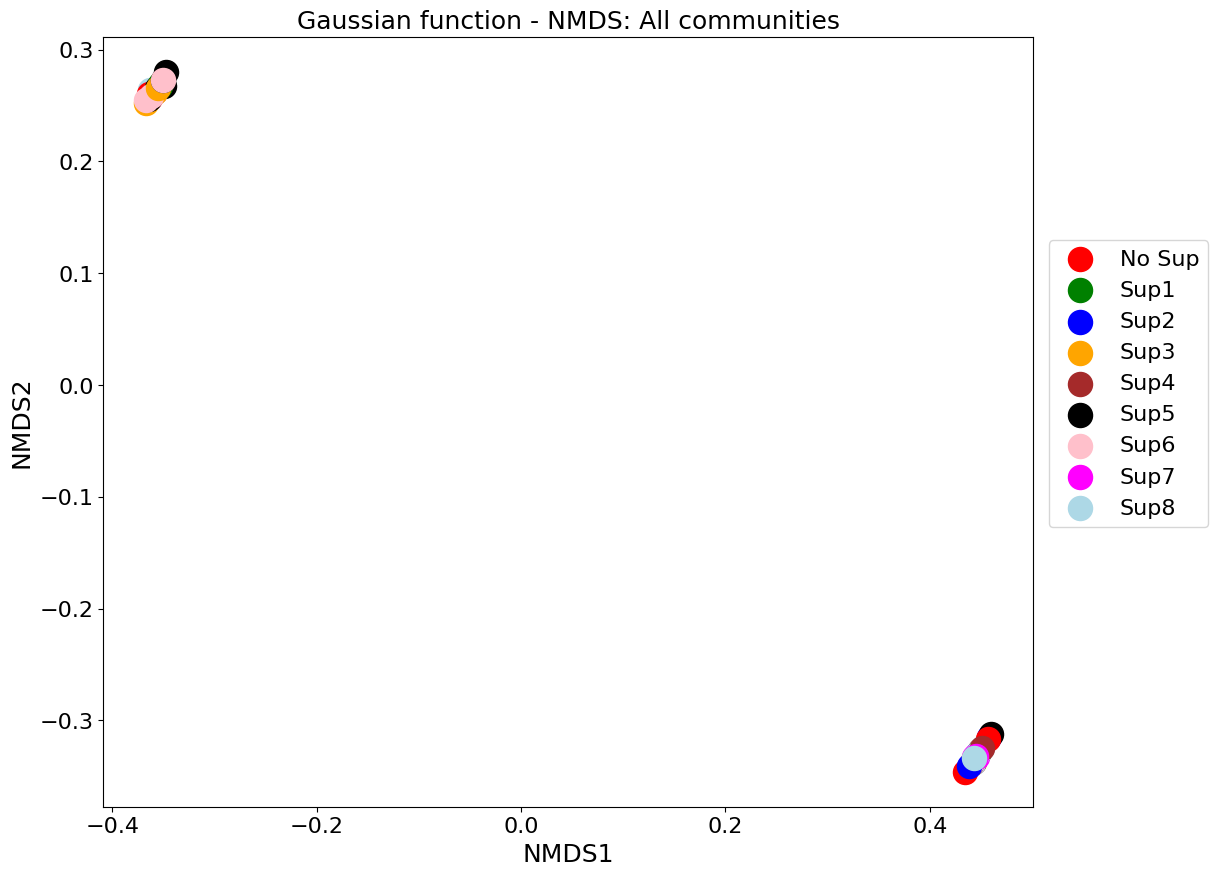

In [21]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'figure.figsize': [12, 10]})

def legend_without_duplicate_labels(figure):
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    figure.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.2, 0.75))
    
label_df2 = nmds_py.iloc[:, 0]

colors = ['Red', 'Green', 'Blue', 'Orange', 'Brown', 'Black', 'Pink', 'Magenta', 'Lightblue'] * 6

for x,y,z,j in zip(nmds_py["MDS1"], nmds_py['MDS2'], label_df2, colors):
    plt.scatter(x,y, label = z, s = 300, c = j)
    #plt.legend(x)
    legend_without_duplicate_labels(plt)
    plt.ylabel('NMDS2', fontsize = 18)
    plt.xlabel('NMDS1', fontsize = 18)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    #plt.xlim(-1,1)
    #plt.ylim(-1,1)
    #plt.xscale('log')
    #plt.yscale('symlog')
    plt.title('Gaussian function - NMDS: All communities', fontsize = 18)
plt.rcParams["svg.fonttype"] = "none"
#plt.savefig('Supp_gaussian_sim_NMDS.svg', bbox_inches = 'tight')

/var/folders/_n/drkfc7xj0_b5jpq4c8c19f240000gn/T/ipykernel_29117/3178960737.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_data = linkage(df1x_bc.data, method='weighted')


0.999987804820206


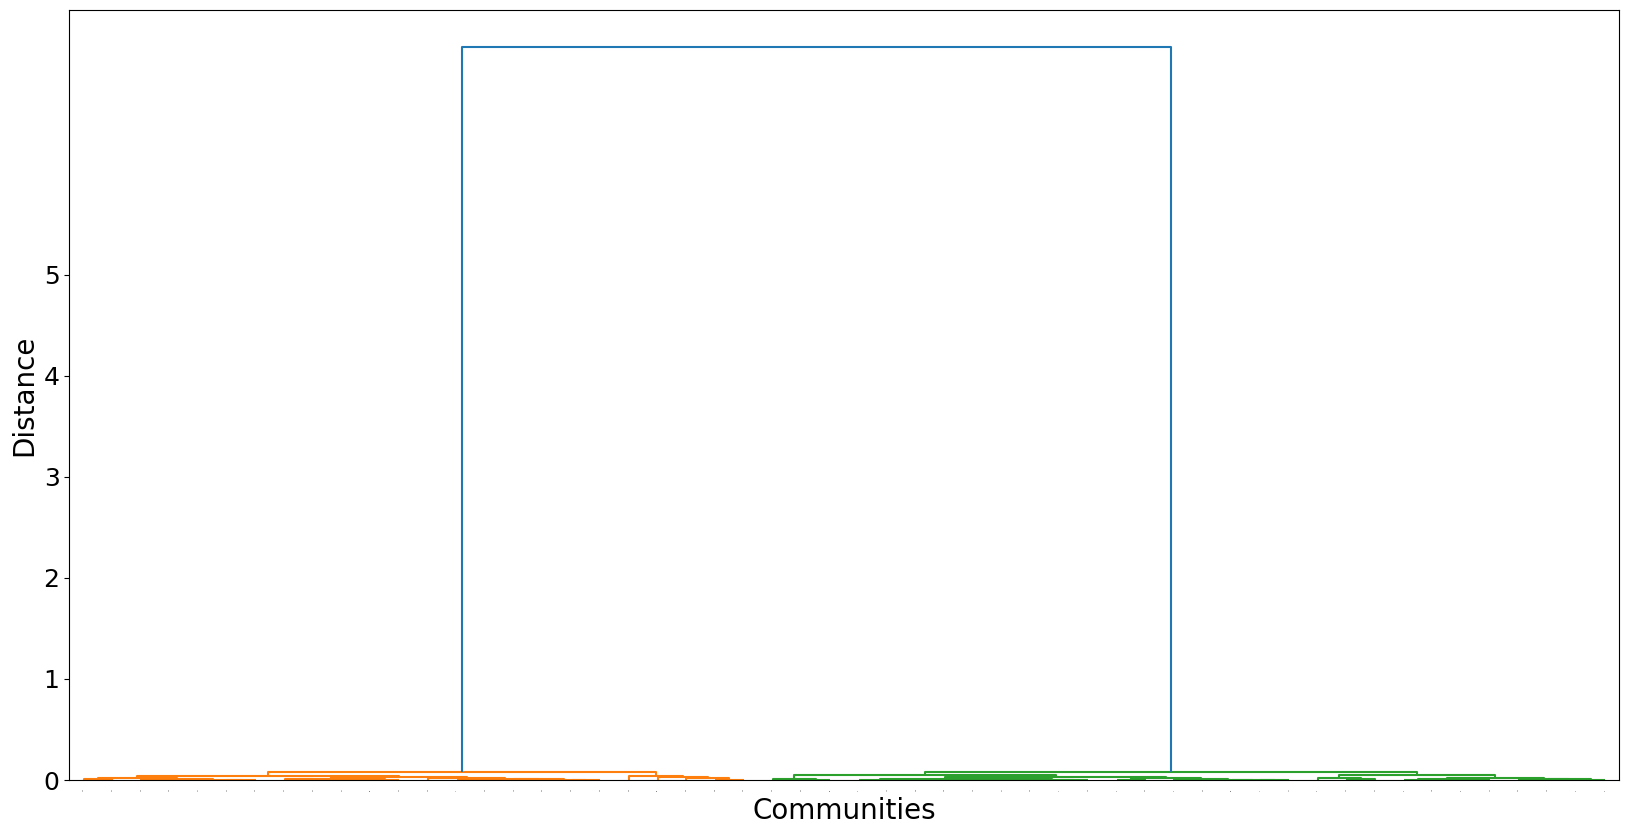

In [22]:
import matplotlib as mpl
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list, fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
#supsx = nmds_df2['Unnamed: 0'].to_list()

linkage_data = linkage(df1x_bc.data, method='weighted')
dendrogram(linkage_data)
#plt.title('All communities: Hierarchical clustering')

c, coph_dists = cophenet(linkage_data, pdist(df1x_bc.data))
print(c)
#plt.text(900,12,"Cophonetic correlation = " + "\n" + str(c))
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 10)
plt.xlabel("Communities", fontsize = 20)
plt.yticks([0,1,2,3,4,5], fontsize = 18)
plt.xticks(fontsize = 0) 
#plt.title("Final Communities Set 2 avg ALL COMMS", fontsize = 20)
plt.ylabel('Distance', fontsize = 20)
plt.rcParams["svg.fonttype"] = "none"
#plt.savefig('Supp_gaussian_sim_hierarchical_clustering.svg', bbox_inches = 'tight')
#orange cluster1
#green cluster 2
#red cluster 3
#purple cluster 4

In [23]:
import scipy
#k = 4
clusters = fcluster(linkage_data,t = 3, criterion='distance', depth=2, R=None, monocrit=None)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 2, 1, 1], dtype=int32)

In [24]:
k = 2
cluster_ids_df2 = fcluster(linkage_data, k, criterion='maxclust')
cluster_ids_df2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 2, 1, 1], dtype=int32)

In [25]:
nmds_py['cluster_id'] = clusters
nmds_py

,Sups,MDS1,MDS2,cluster_id
0,No Sup,-0.360178,0.261834,2
1,Sup1,-0.352579,0.269557,2
2,Sup2,-0.359063,0.261842,2
3,Sup3,-0.356429,0.264687,2
4,Sup4,-0.354061,0.267685,2
5,Sup5,-0.347156,0.280276,2
6,Sup6,-0.360018,0.261686,2
7,Sup7,-0.358318,0.262481,2
8,Sup8,-0.363277,0.263730,2
9,No Sup,-0.363134,0.257159,2


In [26]:
nmds_py1 = nmds_py.copy()
#print(nmds_df3)
nmds_py1 = nmds_py1.drop(columns = ['Sups','cluster_id'], axis = 1)

from sklearn.cluster import KMeans
# Number of clusters
k = 2

# KMeans clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(nmds_py1)

# Add cluster information to DataFrame
nmds_py['Kmeans_cluster'] = kmeans.labels_
nmds_py

,Sups,MDS1,MDS2,cluster_id,Kmeans_cluster
0,No Sup,-0.360178,0.261834,2,0
1,Sup1,-0.352579,0.269557,2,0
2,Sup2,-0.359063,0.261842,2,0
3,Sup3,-0.356429,0.264687,2,0
4,Sup4,-0.354061,0.267685,2,0
5,Sup5,-0.347156,0.280276,2,0
6,Sup6,-0.360018,0.261686,2,0
7,Sup7,-0.358318,0.262481,2,0
8,Sup8,-0.363277,0.263730,2,0
9,No Sup,-0.363134,0.257159,2,0


In [27]:
nmds_py['Kmeans_cluster'] = nmds_py['Kmeans_cluster'].map({1: 2, 2: 1})
nmds_py

,Sups,MDS1,MDS2,cluster_id,Kmeans_cluster
0,No Sup,-0.360178,0.261834,2,NaN
1,Sup1,-0.352579,0.269557,2,NaN
2,Sup2,-0.359063,0.261842,2,NaN
3,Sup3,-0.356429,0.264687,2,NaN
4,Sup4,-0.354061,0.267685,2,NaN
5,Sup5,-0.347156,0.280276,2,NaN
6,Sup6,-0.360018,0.261686,2,NaN
7,Sup7,-0.358318,0.262481,2,NaN
8,Sup8,-0.363277,0.263730,2,NaN
9,No Sup,-0.363134,0.257159,2,NaN


([<matplotlib.axis.YTick at 0x7f8e50b528b0>,
 [Text(0, 1, '1'), Text(0, 2, '2')])

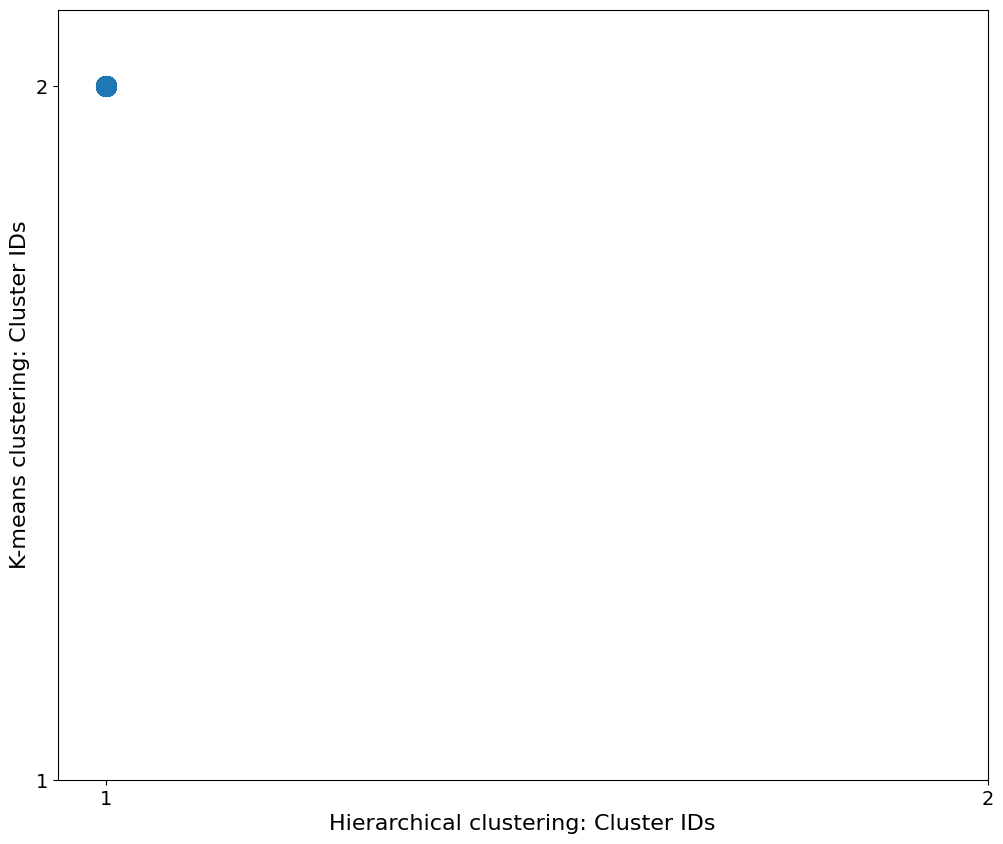

In [28]:
plt.scatter(nmds_py['cluster_id'], nmds_py['Kmeans_cluster'], s = 200)
plt.xlabel('Hierarchical clustering: Cluster IDs', fontsize = 16)
plt.ylabel('K-means clustering: Cluster IDs', fontsize = 16)
plt.xticks([1,2], fontsize = 14)
plt.yticks([1,2], fontsize = 14)

In [29]:
no_sup = [0,9,18,27,36,45]
no_sup_df = nmds_py.loc[[0,9,18,27,36,45],:]
sup_df = nmds_py.loc[[x+8 for x in no_sup],:]
print(no_sup_df)

      Sups      MDS1      MDS2  cluster_id  Kmeans_cluster
0   No Sup -0.360178  0.261834           2             NaN
9   No Sup -0.363134  0.257159           2             NaN
18  No Sup -0.363548  0.259960           2             NaN
27  No Sup -0.353307  0.268709           2             NaN
36  No Sup  0.434754 -0.345871           1             2.0
45  No Sup  0.457116 -0.316318           1             2.0


Text(0.5, 1.0, 'Final community states : Supernatant 8')

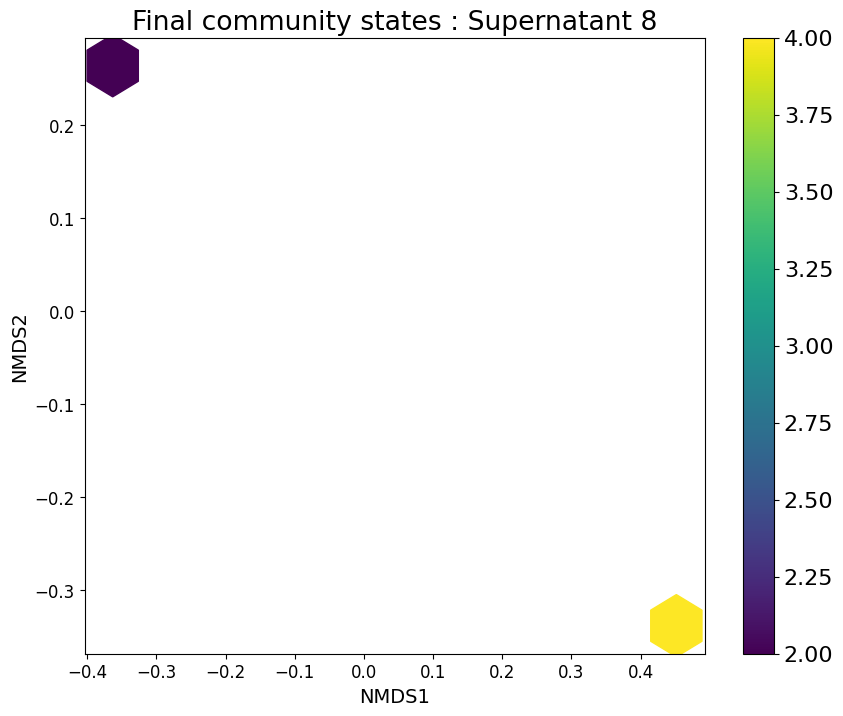

In [30]:
plt.figure(figsize=(10,8))
x = sup_df['MDS1']
y = sup_df['MDS2']

ax = plt.hexbin(x= x, y= y, gridsize = 11, cmap = 'viridis', marginals = False, mincnt=0.001) #
#plt.xlim([-4000,2000])
#plt.ylim([-450,250])
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.colorbar(ax)
plt.xlabel('NMDS1', fontsize = 14)
plt.ylabel('NMDS2', fontsize = 14)
plt.title("Final community states : Supernatant 8")

Text(0, 0.5, 'NMDS2')

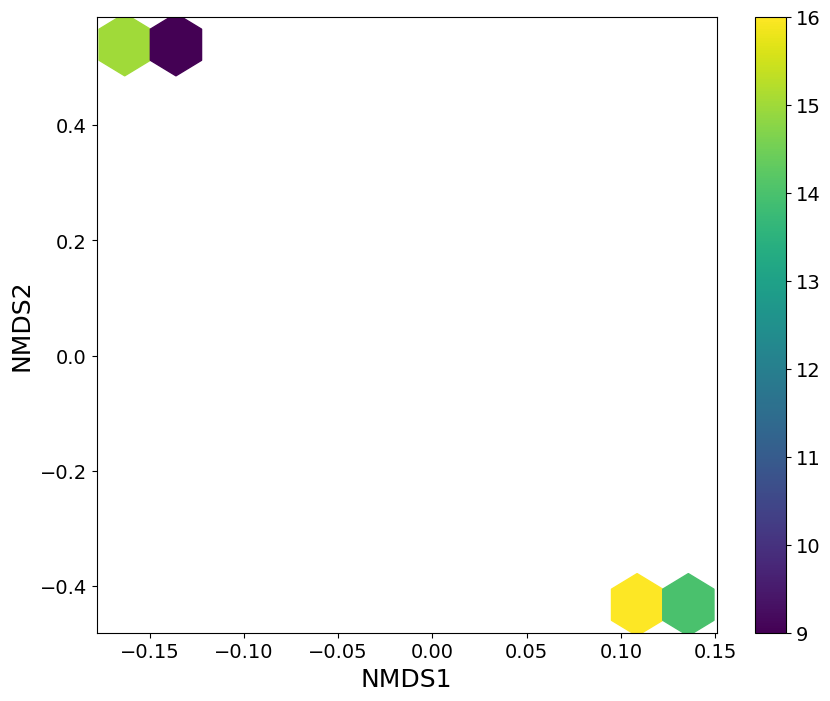

In [33]:
plt.figure(figsize=(10,8))
x = nmds_py['MDS1']
y = nmds_py['MDS2']
z = nmds_py['Kmeans_cluster']

ax = plt.hexbin(x= x, y= y, gridsize = 11, cmap = 'viridis', marginals = False, mincnt=0.001) #
#plt.xlim([-4000,2000])
#plt.ylim([-450,250])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
cbar = plt.colorbar(ax)
cbar.ax.tick_params(labelsize=14)
plt.xlabel('NMDS1', fontsize = 18)
plt.ylabel('NMDS2', fontsize = 18)
#plt.title("Final community states")


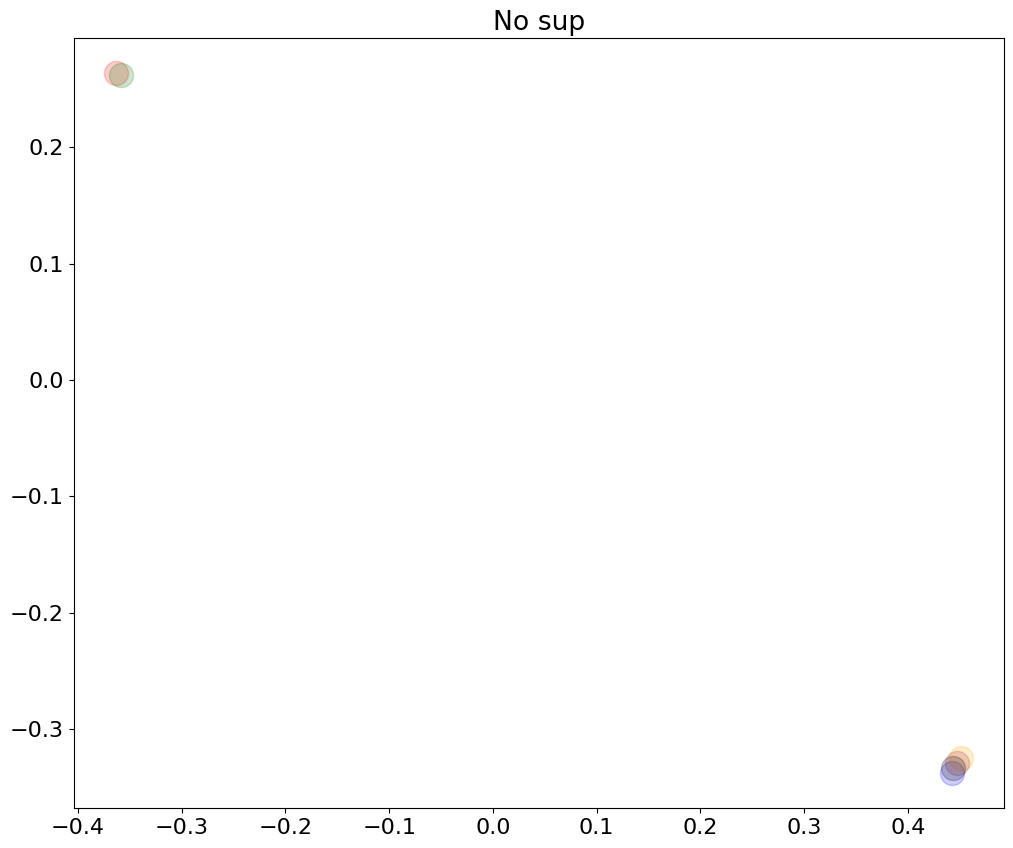

In [31]:
colors = ['Red', 'Green', 'Blue', 'Orange', 'Brown', 'Black', 'Pink', 'Magenta', 'Lightblue']

for x,y,j in zip(sup_df["MDS1"], sup_df['MDS2'], colors):
    plt.scatter(x,y, s = 300, c = j, alpha = 0.2)
    plt.title('No sup')

In [32]:
#Heatmap and Probability of transition to different states
from operator import itemgetter
pd.options.display.max_rows = 300

#print(cluster_ids_df2)
print(clusters)

Probs_list = []
#for n, i in zip(range(0,9),cluster_ids_df2):
for n, i in zip(range(0,9),clusters):
    j = []
    b = [n, n+9,n+18,n+27,n+36,n+45]
    #print(len(b))
    #j.append(itemgetter(*b)(cluster_ids_df2))
    j.append(itemgetter(*b)(clusters))
    print(j)
    Probs_list.append(j)

[2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 1 2 2 1 1 2 2 1 2 1 2 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 1 1]
[(2, 2, 2, 2, 1, 1)]
[(2, 2, 2, 2, 1, 2)]
[(2, 1, 1, 1, 1, 1)]
[(2, 2, 2, 2, 1, 2)]
[(2, 2, 1, 1, 1, 1)]
[(2, 2, 2, 2, 1, 2)]
[(2, 2, 2, 2, 1, 2)]
[(2, 1, 1, 1, 1, 1)]
[(2, 2, 1, 1, 1, 1)]


In [33]:
Probs = []
for x in Probs_list:
    Probs.append(list(x[0]))
    print(x)
Probs

[(2, 2, 2, 2, 1, 1)]
[(2, 2, 2, 2, 1, 2)]
[(2, 1, 1, 1, 1, 1)]
[(2, 2, 2, 2, 1, 2)]
[(2, 2, 1, 1, 1, 1)]
[(2, 2, 2, 2, 1, 2)]
[(2, 2, 2, 2, 1, 2)]
[(2, 1, 1, 1, 1, 1)]
[(2, 2, 1, 1, 1, 1)]


[[2, 2, 2, 2, 1, 1],
 [2, 2, 2, 2, 1, 2],
 [2, 1, 1, 1, 1, 1],
 [2, 2, 2, 2, 1, 2],
 [2, 2, 1, 1, 1, 1],
 [2, 2, 2, 2, 1, 2],
 [2, 2, 2, 2, 1, 2],
 [2, 1, 1, 1, 1, 1],
 [2, 2, 1, 1, 1, 1]]

In [34]:
Prob_dfx = pd.DataFrame(columns = Supsx[0:9])
Prob_dfx
for x,i in zip(Probs[1:], np.arange(1,10)):
    Prob_dfx['Sup'+ str(i)] = x

In [35]:
Prob_dfx['No Sup'] = Probs[0]
Prob_dfx

,No Sup,Sup1,Sup2,Sup3,Sup4,Sup5,Sup6,Sup7,Sup8
0,2,2,2,2,2,2,2,2,2
1,2,2,1,2,2,2,2,1,2
2,2,2,1,2,1,2,2,1,1
3,2,2,1,2,1,2,2,1,1
4,1,1,1,1,1,1,1,1,1
5,1,2,1,2,1,2,2,1,1


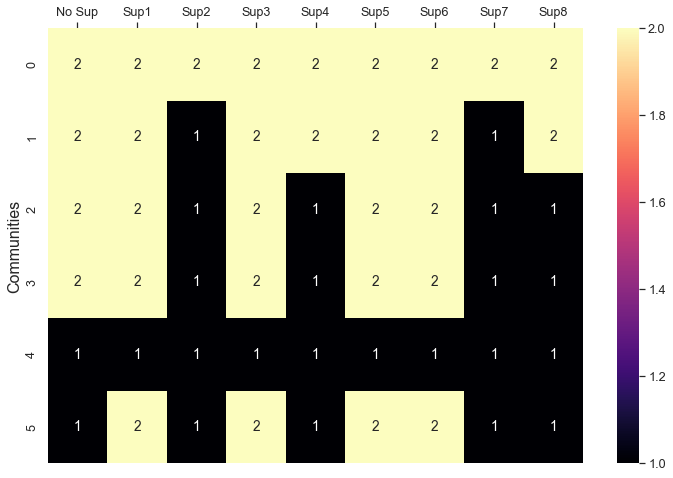

In [36]:
import seaborn as sns
%matplotlib inline
sns.set(font_scale = 1.15)
ax = sns.heatmap(Prob_dfx, annot=True,cmap="magma")
#ax.hlines([3, 6, 9,12,15], *ax.get_xlim(), color = 'white')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 8)
ax.set(ylabel='Communities')
ax.yaxis.label.set(fontsize=16)
ax.xaxis.tick_top()
plt.rcParams["svg.fonttype"] = "none"

#plt.savefig('Supp_gaussian_sim_heatmap.svg', bbox_inches = 'tight')

In [37]:
States = [1,2]
y = (Prob_dfx['Sup1'].value_counts().reindex(States[::1], fill_value=0))
y

Sup1
1    1
2    5
Name: count, dtype: int64

In [38]:
prob_sup = []
supss = Supsx[0:10]
for i in range(0,9):
    y = (Prob_dfx.iloc[:,i].value_counts().reindex(States[::1], fill_value=0))
    #print(y)
    prob_sup.append(y)
    
#prob_sup

In [39]:
prob_sup1 = []
for i in range(0,9):
    x = (prob_sup[i])
    x = [a/6 for a in x]
    print(x)
    prob_sup1.append(x)
    
prob_sup1

[0.3333333333333333, 0.6666666666666666]
[0.16666666666666666, 0.8333333333333334]
[0.8333333333333334, 0.16666666666666666]
[0.16666666666666666, 0.8333333333333334]
[0.6666666666666666, 0.3333333333333333]
[0.16666666666666666, 0.8333333333333334]
[0.16666666666666666, 0.8333333333333334]
[0.8333333333333334, 0.16666666666666666]
[0.6666666666666666, 0.3333333333333333]


[[0.3333333333333333, 0.6666666666666666],
 [0.16666666666666666, 0.8333333333333334],
 [0.8333333333333334, 0.16666666666666666],
 [0.16666666666666666, 0.8333333333333334],
 [0.6666666666666666, 0.3333333333333333],
 [0.16666666666666666, 0.8333333333333334],
 [0.16666666666666666, 0.8333333333333334],
 [0.8333333333333334, 0.16666666666666666],
 [0.6666666666666666, 0.3333333333333333]]

In [41]:
np.asarray(prob_sup1).shape
state1 = []
state2 = []
for x in prob_sup1:
    state1.append(x[0])
    state2.append(x[1])
state2

[0.6666666666666666,
 0.8333333333333334,
 0.16666666666666666,
 0.8333333333333334,
 0.3333333333333333,
 0.8333333333333334,
 0.8333333333333334,
 0.16666666666666666,
 0.3333333333333333]

/var/folders/_n/drkfc7xj0_b5jpq4c8c19f240000gn/T/ipykernel_29117/3068797630.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  magma = cm.get_cmap('magma', 12)


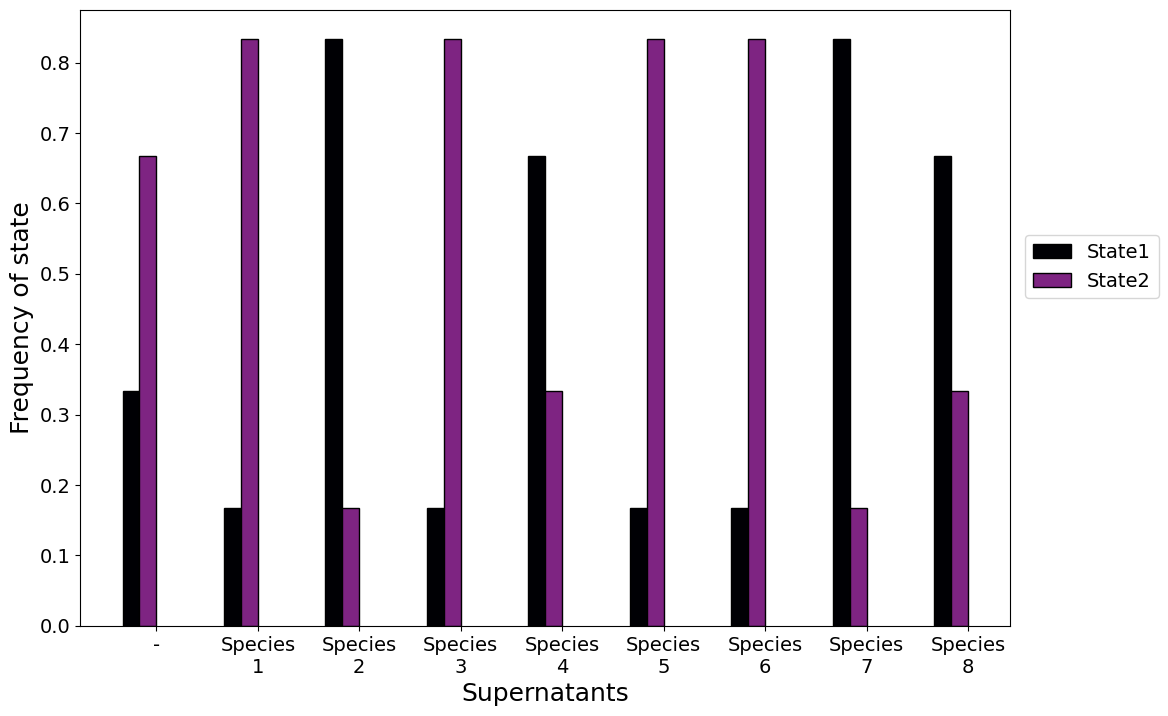

In [42]:
plt.rcParams.update(plt.rcParamsDefault)
import matplotlib.style
import matplotlib as mpl
from matplotlib import cm
plt.rcParams["figure.figsize"] = (12,8)

magma = cm.get_cmap('magma', 12)
print(magma)

lablex = ['-', 'Species\n1','Species\n2','Species\n3','Species\n4','Species\n5','Species\n6','Species\n7','Species\n8']

r = np.arange(1,27,3) 
width = 0.5
width1 = 1
ax = plt.gca()
ax.grid(False)

plt.bar(r, state1, color = magma(0), 
        width = width, edgecolor = 'black', 
        label='State1') 
plt.bar(r + width, state2, color = magma(4), 
        width = width, edgecolor = 'black', 
        label='State2')
# plt.bar(r + width1, state3, color = magma(8), 
#         width = width, edgecolor = 'black', 
#         label='State3')
# plt.bar(r + width + width1, state4, color = magma(12), 
#         width = width, edgecolor = 'black', 
#         label='State4')


plt.xticks(ticks = 0.75 + np.arange(1,27,3),labels = lablex, fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Frequency of state', fontsize = 18)
plt.xlabel('Supernatants', fontsize = 18)
plt.legend(fontsize = 14, bbox_to_anchor = [1.17,0.65])
plt.rcParams["svg.fonttype"] = "none"
#plt.savefig('Supp_gaussian_sim_frequency.svg', bbox_inches = 'tight')

In [43]:
s = np.arange(1,5,0.001)
print(s)
sx = []
so = 3
for wi in s:
    #r=heaviside(1-absolute(wi-so),1)
    r = np.exp(-((np.abs(wi - so)) ** 2))
    sx.append(r)

[1.    1.001 1.002 1.003 1.004 1.005 1.006 1.007 1.008 1.009 1.01  1.011
 1.012 1.013 1.014 1.015 1.016 1.017 1.018 1.019 1.02  1.021 1.022 1.023
 1.024 1.025 1.026 1.027 1.028 1.029 1.03  1.031 1.032 1.033 1.034 1.035
 1.036 1.037 1.038 1.039 1.04  1.041 1.042 1.043 1.044 1.045 1.046 1.047
 1.048 1.049 1.05  1.051 1.052 1.053 1.054 1.055 1.056 1.057 1.058 1.059
 1.06  1.061 1.062 1.063 1.064 1.065 1.066 1.067 1.068 1.069 1.07  1.071
 1.072 1.073 1.074 1.075 1.076 1.077 1.078 1.079 1.08  1.081 1.082 1.083
 1.084 1.085 1.086 1.087 1.088 1.089 1.09  1.091 1.092 1.093 1.094 1.095
 1.096 1.097 1.098 1.099 1.1   1.101 1.102 1.103 1.104 1.105 1.106 1.107
 1.108 1.109 1.11  1.111 1.112 1.113 1.114 1.115 1.116 1.117 1.118 1.119
 1.12  1.121 1.122 1.123 1.124 1.125 1.126 1.127 1.128 1.129 1.13  1.131
 1.132 1.133 1.134 1.135 1.136 1.137 1.138 1.139 1.14  1.141 1.142 1.143
 1.144 1.145 1.146 1.147 1.148 1.149 1.15  1.151 1.152 1.153 1.154 1.155
 1.156 1.157 1.158 1.159 1.16  1.161 1.162 1.163 1.

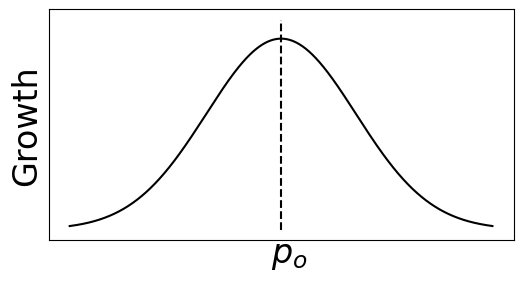

In [44]:
ax = plt.figure(figsize = (6,3))
plt.plot(s,sx, color = 'black')
plt.vlines(x = 3, ymin = 0, ymax = 1.1, linestyle = '--', color = 'black')
plt.xticks([],[])
plt.yticks([],[])
plt.ylabel('Growth', fontsize = 24)
ax = plt.gca()
ax.text(2.9,-0.17, s = '$p_{o}$', fontsize = 24)
plt.rcParams["svg.fonttype"] = "none"
#plt.savefig('Supp_gaussian_sim_growth_po.svg', bbox_inches = 'tight')